# Set up

In [1]:
import pandas as pd

# Load data

In [2]:
# Raw data
df = pd.read_excel('../RawData/RawData_230519to230522.xlsx', sheet_name=1, header=0, index_col=0) # 5/23/2023: changed the file name, added the sheet_name
df.head()

,START,END,TIME,F1,F2t1,F3,SC1,Q1,Q2,Q3,...,Q22,Q23t1,Q24,Q25t1,Q26,Q27t1,Q28,Q29t1,STA,GATE
MID,,,,,,,,,,,,,,,,,,,,,
1,2023/05/19-12:49:32,2023/05/19-12:51:56,00:02:24,2,50,13,1,6,1,2,...,3,回答なし,5,回答なし,7,回答なし,7,回答なし,COMP,6
2,2023/05/19-12:49:10,2023/05/19-12:52:07,00:02:57,1,40,7,1,5,2,2,...,3,回答なし,3,回答なし,3,回答なし,4,回答なし,COMP,5
3,2023/05/19-12:49:28,2023/05/19-12:55:05,00:05:37,2,40,23,1,2,2,1,...,2,仕事を抱え込む,7,チェックが細かい,7,基本受け身,2,話が下手,COMP,2
4,2023/05/19-12:55:11,2023/05/19-12:57:07,00:01:56,1,48,39,1,1,3,2,...,4,回答なし,4,回答なし,4,回答なし,4,回答なし,COMP,1
5,2023/05/19-12:54:24,2023/05/19-12:57:31,00:03:07,1,46,18,1,2,3,1,...,4,ない,4,ない,3,なし,4,なし,COMP,2


In [3]:
# Rename variables
var_df = pd.read_excel('../Materials/variables.xlsx', sheet_name=1, header=0, index_col=None) # 5/23/2023: changed the sheet for new one
var_dict = dict(zip(var_df['name1'], var_df['name2']))
df = df.rename(columns=var_dict)
df.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1,2023/05/19-12:49:32,2023/05/19-12:51:56,00:02:24,2,50,13,1,6,1,2,...,3,回答なし,5,回答なし,7,回答なし,7,回答なし,COMP,6
2,2023/05/19-12:49:10,2023/05/19-12:52:07,00:02:57,1,40,7,1,5,2,2,...,3,回答なし,3,回答なし,3,回答なし,4,回答なし,COMP,5
3,2023/05/19-12:49:28,2023/05/19-12:55:05,00:05:37,2,40,23,1,2,2,1,...,2,仕事を抱え込む,7,チェックが細かい,7,基本受け身,2,話が下手,COMP,2
4,2023/05/19-12:55:11,2023/05/19-12:57:07,00:01:56,1,48,39,1,1,3,2,...,4,回答なし,4,回答なし,4,回答なし,4,回答なし,COMP,1
5,2023/05/19-12:54:24,2023/05/19-12:57:31,00:03:07,1,46,18,1,2,3,1,...,4,ない,4,ない,3,なし,4,なし,COMP,2


In [4]:
# added on 5/23/2023
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 182
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   start                        182 non-null    object
 1   end                          182 non-null    object
 2   rt                           182 non-null    object
 3   self_sex                     182 non-null    int64 
 4   self_age                     182 non-null    int64 
 5   residence                    182 non-null    int64 
 6   participation                182 non-null    int64 
 7   IOS_score                    182 non-null    int64 
 8   target_likedislike           182 non-null    int64 
 9   target_sex                   182 non-null    int64 
 10  target_age                   182 non-null    int64 
 11  relationship                 182 non-null    object
 12  self_tolerance_score         182 non-null    int64 
 13  self_tolerance_text          182 non-nul

# Data Exclusion
- Participants described bellow will be excluded from the analysis.
	- They indicate their first language is not Japanese.
	- They do not complete any items in the given questionnaire.
	- They spend time less than 1.5 interquartile range (IQR) below the lower quartile (Q1) or more than 1.5 IQR above the upper quartile (Q3) on completing the questionnaire. 


In [5]:
# Participants who DID NOT complete ANY items
df = df.dropna(how='all')
df.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1,2023/05/19-12:49:32,2023/05/19-12:51:56,00:02:24,2,50,13,1,6,1,2,...,3,回答なし,5,回答なし,7,回答なし,7,回答なし,COMP,6
2,2023/05/19-12:49:10,2023/05/19-12:52:07,00:02:57,1,40,7,1,5,2,2,...,3,回答なし,3,回答なし,3,回答なし,4,回答なし,COMP,5
3,2023/05/19-12:49:28,2023/05/19-12:55:05,00:05:37,2,40,23,1,2,2,1,...,2,仕事を抱え込む,7,チェックが細かい,7,基本受け身,2,話が下手,COMP,2
4,2023/05/19-12:55:11,2023/05/19-12:57:07,00:01:56,1,48,39,1,1,3,2,...,4,回答なし,4,回答なし,4,回答なし,4,回答なし,COMP,1
5,2023/05/19-12:54:24,2023/05/19-12:57:31,00:03:07,1,46,18,1,2,3,1,...,4,ない,4,ない,3,なし,4,なし,COMP,2


In [6]:
# added on 5/23/2023
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 182
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   start                        182 non-null    object
 1   end                          182 non-null    object
 2   rt                           182 non-null    object
 3   self_sex                     182 non-null    int64 
 4   self_age                     182 non-null    int64 
 5   residence                    182 non-null    int64 
 6   participation                182 non-null    int64 
 7   IOS_score                    182 non-null    int64 
 8   target_likedislike           182 non-null    int64 
 9   target_sex                   182 non-null    int64 
 10  target_age                   182 non-null    int64 
 11  relationship                 182 non-null    object
 12  self_tolerance_score         182 non-null    int64 
 13  self_tolerance_text          182 non-nul

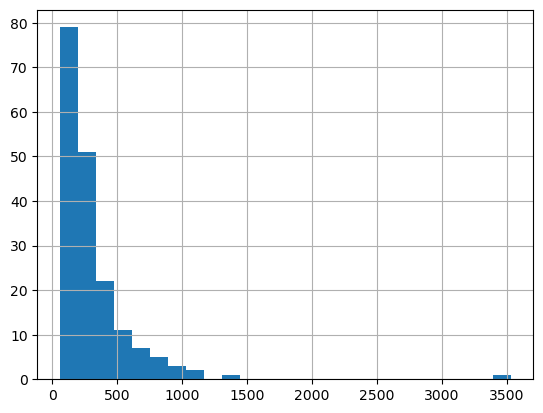

In [7]:
# Convert Datetimeindex to a numeric format
# added on 5/23/2023
rt = pd.to_datetime(df.end) - pd.to_datetime(df.start)
df['rt'] = pd.to_timedelta(rt).dt.total_seconds()
hist = df['rt'].hist(bins=25)

In [8]:
# IQR
q1 = df['rt'].quantile(0.25)
q3 = df['rt'].quantile(0.75)
iqr = q3 - q1

# Participants who spend time less than 1.5 IQR below the lower quatile (Q1)
lower_limit = q1 - 1.5 * iqr

# Participants who spend time more than 1.5 IQR above the upper quatile (Q3)
upper_limit = q3 + 1.5 * iqr


df_low = df[df['rt'] <= lower_limit]
df_upp = df[df['rt'] >= upper_limit]


In [9]:
# Exlude outlier
df = df[df['rt'] > lower_limit]
df= df[df['rt'] < upper_limit]

df.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1,2023/05/19-12:49:32,2023/05/19-12:51:56,144.0,2,50,13,1,6,1,2,...,3,回答なし,5,回答なし,7,回答なし,7,回答なし,COMP,6
2,2023/05/19-12:49:10,2023/05/19-12:52:07,177.0,1,40,7,1,5,2,2,...,3,回答なし,3,回答なし,3,回答なし,4,回答なし,COMP,5
3,2023/05/19-12:49:28,2023/05/19-12:55:05,337.0,2,40,23,1,2,2,1,...,2,仕事を抱え込む,7,チェックが細かい,7,基本受け身,2,話が下手,COMP,2
4,2023/05/19-12:55:11,2023/05/19-12:57:07,116.0,1,48,39,1,1,3,2,...,4,回答なし,4,回答なし,4,回答なし,4,回答なし,COMP,1
5,2023/05/19-12:54:24,2023/05/19-12:57:31,187.0,1,46,18,1,2,3,1,...,4,ない,4,ない,3,なし,4,なし,COMP,2


In [10]:
# added on 5/23/2023
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 1 to 181
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   start                        166 non-null    object 
 1   end                          166 non-null    object 
 2   rt                           166 non-null    float64
 3   self_sex                     166 non-null    int64  
 4   self_age                     166 non-null    int64  
 5   residence                    166 non-null    int64  
 6   participation                166 non-null    int64  
 7   IOS_score                    166 non-null    int64  
 8   target_likedislike           166 non-null    int64  
 9   target_sex                   166 non-null    int64  
 10  target_age                   166 non-null    int64  
 11  relationship                 166 non-null    object 
 12  self_tolerance_score         166 non-null    int64  
 13  self_tolerance_text      

In [11]:
# When responses to the open-ended questions are “I would not like to answer this question,” they will be excluded from the analysis.
# df = df.replace('答えない', '') # deleted on 5/23/2023
df = df.replace(['回答なし', '回答無し'], '') # added on 5/23/2023
df.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1,2023/05/19-12:49:32,2023/05/19-12:51:56,144.0,2,50,13,1,6,1,2,...,3,,5,,7,,7,,COMP,6
2,2023/05/19-12:49:10,2023/05/19-12:52:07,177.0,1,40,7,1,5,2,2,...,3,,3,,3,,4,,COMP,5
3,2023/05/19-12:49:28,2023/05/19-12:55:05,337.0,2,40,23,1,2,2,1,...,2,仕事を抱え込む,7,チェックが細かい,7,基本受け身,2,話が下手,COMP,2
4,2023/05/19-12:55:11,2023/05/19-12:57:07,116.0,1,48,39,1,1,3,2,...,4,,4,,4,,4,,COMP,1
5,2023/05/19-12:54:24,2023/05/19-12:57:31,187.0,1,46,18,1,2,3,1,...,4,ない,4,ない,3,なし,4,なし,COMP,2


# Output
Save:
- Text data as txt
- Data frame as xlsx

## Text Data

In [12]:
text_vars_self = [
	'self_tolerance_text',
	'self_pleasantness_text',
	'self_responsibility_text',
	'self_carefulness_text',
	'self_activeness_text',
	'self_sociability_text']

text_vars_target = [
	'target_tolerance_text',
	'target_pleasantness_text',
	'target_responsibility_text',
	'target_carefulness_text',
	'target_activeness_text',
	'target_sociability_text']

In [13]:
text_vars_self

['self_tolerance_text',
 'self_pleasantness_text',
 'self_responsibility_text',
 'self_carefulness_text',
 'self_activeness_text',
 'self_sociability_text']

In [14]:
text_vars_target

['target_tolerance_text',
 'target_pleasantness_text',
 'target_responsibility_text',
 'target_carefulness_text',
 'target_activeness_text',
 'target_sociability_text']

In [15]:
print(text_vars_self + text_vars_target)

['self_tolerance_text', 'self_pleasantness_text', 'self_responsibility_text', 'self_carefulness_text', 'self_activeness_text', 'self_sociability_text', 'target_tolerance_text', 'target_pleasantness_text', 'target_responsibility_text', 'target_carefulness_text', 'target_activeness_text', 'target_sociability_text']


In [16]:
text_vars_all =  text_vars_self + text_vars_target
df.loc[:, text_vars_all].head()

,self_tolerance_text,self_pleasantness_text,self_responsibility_text,self_carefulness_text,self_activeness_text,self_sociability_text,target_tolerance_text,target_pleasantness_text,target_responsibility_text,target_carefulness_text,target_activeness_text,target_sociability_text
MID,,,,,,,,,,,,
1,,,,,,,,,,,,
2,,愛想がない,,,,,,,,,,
3,怒ったことがない,よく道を聞かれる,世話好きでリーダー肌,計画する前に動く,行動力がある,友達がいない,怒らない,優しそうでお人好し,仕事を抱え込む,チェックが細かい,基本受け身,話が下手
4,,,,,,,,,,,,
5,ない,遊んでいて楽しい,ない,ない,なし,なし,ない,なし,ない,ない,なし,なし


In [17]:
filename = './Results/output01_all.txt'
with open(filename, 'w') as f:
	df_string = df.loc[:, text_vars_all].to_string(header=False, index=False)
	f.write(df_string)

In [18]:
filename = './Results/output01_self.txt'
with open(filename, 'w') as f:
	df_string = df.loc[:, text_vars_self].to_string(header=False, index=False)
	f.write(df_string)

In [19]:
filename = './Results/output01_target.txt'
with open(filename, 'w') as f:
	df_string = df.loc[:, text_vars_target].to_string(header=False, index=False)
	f.write(df_string)

## Data Frame

In [20]:
df.drop(text_vars_all, axis='columns', inplace=True)
df.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,self_activeness_score,self_sociability_score,target_tolerance_score,target_pleasantness_score,target_responsibility_score,target_carefulness_score,target_activeness_score,target_sociability_score,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1,2023/05/19-12:49:32,2023/05/19-12:51:56,144.0,2,50,13,1,6,1,2,...,3,7,7,7,3,5,7,7,COMP,6
2,2023/05/19-12:49:10,2023/05/19-12:52:07,177.0,1,40,7,1,5,2,2,...,2,2,5,5,3,3,3,4,COMP,5
3,2023/05/19-12:49:28,2023/05/19-12:55:05,337.0,2,40,23,1,2,2,1,...,1,2,1,7,2,7,7,2,COMP,2
4,2023/05/19-12:55:11,2023/05/19-12:57:07,116.0,1,48,39,1,1,3,2,...,4,4,4,3,4,4,4,4,COMP,1
5,2023/05/19-12:54:24,2023/05/19-12:57:31,187.0,1,46,18,1,2,3,1,...,4,4,3,5,4,4,3,4,COMP,2


In [21]:
filename = './Results/output01_all.csv'
df.to_csv(filename, index=True)